### 예제 1 : classification of iris data 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\Yeojin\Anaconda3_py36(64bit)\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(X, columns = iris.feature_names)
print("< Iris Data >")
print("The number of sample data : " + str(len(df)))
print("The number of features of the data : " + str(len(df.columns)))
print("The labels of the data : " + str(np.unique(y)))
df

< Iris Data >
The number of sample data : 150
The number of features of the data : 4
The labels of the data : [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
# split whole data set into train set and test set
# test_size : the proportion of the dataset to include in the test split. (0~1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

print("The number of train data set : %d " %len(X_train))
print("The number of test data set : %d " %len(X_test))

The number of train data set : 100 
The number of test data set : 50 


In [5]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


In [6]:
# parameter tuning with cross validation
# note! Using the test set for hyperparameter tuning can lead to overfitting.
# so use a subsest of the training set from the fitting process, it's validation set.
# we will use k-fold cross validation
# divide training set into k groups, or folds, of approximately equal size.
# the first fold is treated as a validation set, and the ethod is fit on the remaining k - 1 folds. 
# the misclassification rate is then computed on the observations in held-out fold. 
# this procedure is repeated k times
# note! cross-validation can be used to estimate the test error associated with a
# learning method in order to evaluate its performance, or to select the appropriate level of flexibility.

In [7]:
# perform 10-fold cross validation 

# create odd list of k for kNN
myList = list(range(1,50))
neighbors = [ x for x in myList if x % 2 != 0]
print(neighbors)
print("The number of neighbors k is %d" %len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The number of neighbors k is 25


In [8]:
# empty list that will hold cross validation scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    print("< k = %d >" %k)
    estimator = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("The scores of classification are \n" + str(scores))
    cv_scores.append(scores.mean()) # average error 
    print("The average score of scores is %.9f \n" %scores.mean())

< k = 1 >
The scores of classification are 
[ 1.          0.90909091  1.          0.72727273  0.9         1.          1.
  1.          1.          0.88888889]
The average score of scores is 0.942525253 

< k = 3 >
The scores of classification are 
[ 0.91666667  1.          1.          0.72727273  0.9         1.          1.
  1.          1.          0.88888889]
The average score of scores is 0.943282828 

< k = 5 >
The scores of classification are 
[ 1.          1.          1.          0.72727273  0.9         1.          1.
  1.          1.          0.88888889]
The average score of scores is 0.951616162 

< k = 7 >
The scores of classification are 
[ 1.          0.90909091  1.          0.72727273  1.          1.          1.
  1.          1.          0.88888889]
The average score of scores is 0.952525253 

< k = 9 >
The scores of classification are 
[ 0.91666667  0.90909091  1.          0.72727273  1.          1.          1.
  1.          1.          0.88888889]
The average score of scor

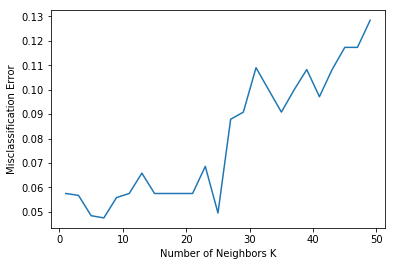

The optimal number of neighbors i is 7


In [9]:
# changing to misclassification rate (a.k.a classification error)
# MSE = 1 - cross validation score
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# determining best k 
min_MSE = min(MSE)
index_of_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_of_min_MSE]
print ("The optimal number of neighbors i is %d" % optimal_k)

In [10]:
# instantiate learning model (k = 7)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


### 예제 2 : classification of breast cancer data 

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import normalize

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

df = pd.DataFrame(X, columns = breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [12]:
X = normalize(X)

In [13]:
# split whole data set into train set and test set
# test_size : the proportion of the dataset to include in the test split. (0~1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

print("The number of train data set : %d " %len(X_train))
print("The number of test data set : %d " %len(X_test))

The number of train data set : 381 
The number of test data set : 188 


In [14]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.925531915


In [15]:
# perform 10-fold cross validation 

# create odd list of k for kNN
myList = list(range(1,100))
neighbors = [ x for x in myList if x % 2 != 0]
print(neighbors)
print("The number of neighbors k is %d" %len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
The number of neighbors k is 50


In [16]:
# empty list that will hold cross validation scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    print("< k = %d >" %k)
    estimator = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("The scores of classification are \n" + str(scores))
    cv_scores.append(scores.mean()) # average error 
    print("The average score of scores is %.9f \n" %scores.mean())

< k = 1 >
The scores of classification are 
[ 0.92307692  0.8974359   0.92307692  0.97435897  0.92307692  0.86842105
  0.89189189  0.86486486  0.94594595  0.86486486]
The average score of scores is 0.907701426 

< k = 3 >
The scores of classification are 
[ 0.94871795  0.8974359   0.8974359   0.94871795  0.94871795  0.86842105
  0.91891892  0.91891892  0.91891892  0.81081081]
The average score of scores is 0.907701426 

< k = 5 >
The scores of classification are 
[ 0.97435897  0.8974359   0.8974359   0.97435897  0.92307692  0.86842105
  0.91891892  0.89189189  0.91891892  0.83783784]
The average score of scores is 0.910265529 

< k = 7 >
The scores of classification are 
[ 0.94871795  0.8974359   0.87179487  0.97435897  0.94871795  0.86842105
  0.91891892  0.89189189  0.94594595  0.83783784]
The average score of scores is 0.910404129 

< k = 9 >
The scores of classification are 
[ 0.97435897  0.8974359   0.84615385  0.97435897  0.94871795  0.84210526
  0.91891892  0.91891892  0.9729729

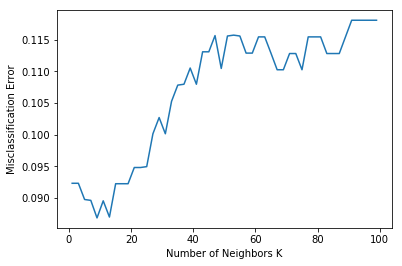

The optimal number of neighbors i is 9


In [17]:
# changing to misclassification rate (a.k.a classification error)
# MSE = 1 - cross validation score
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# determining best k 
min_MSE = min(MSE)
index_of_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_of_min_MSE]
print ("The optimal number of neighbors i is %d" % optimal_k)

In [20]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=13)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.946808511
